# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [59]:
import pandas as pd
import seaborn # подгружаем библиотеку с графиками
from pymystem3 import Mystem #подгружаем библиотеку для леммитизации
m=Mystem()

try:                                            # отсекаем ошибки при чтении файла
    df=pd.read_csv('/datasets/data.csv')
except:
    print( 'Ошибка при чтении файла')   

display(df.sample(10))
display(df.isna().sum()) #ищем кол-во пропусков
display(df.describe()) # gjkexftv jgbcfntkmye. cnfnbcnbre lkz xbckjds[ cnjk,wjd]
display(df.duplicated('days_employed').sum()) #ищем количество неуникальных значений в общем трудовом стаже
display(df.duplicated('total_income').sum()) #ищем количество неуникальных значений в доходах
print('Количество детей', df['children'].unique()) #проверяем уникальные значения по количеству детей
print('Возраст', df['dob_years'].unique()) #проверяем уникальные значения возраста
print('Образование', df['education'].unique()) #смотрим уникальные значения графы "Образование"
print('Семейный статус', df['family_status'].unique()) #смотрим уникальные значения графы "семейный статус"
print('Семейный статус ID', df['family_status_id'].unique()) #смотрим уникальные значения графы "семейный статус ID"
print('Пол', df['gender'].unique()) #смотрим уникальные значения графы "пол"
print('Тип занятости', df['income_type'].unique()) #смотрим уникальные значения графы "тип занятости"
print('Наличие задолженнсоти', df['debt'].unique()) #смотрим уникальные значения графы "задолженность"
print('Цель', df['purpose'].unique()) #смотрим уникальные значения графы "цель кредита"

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
9926,0,-862.443121,43,среднее,1,женат / замужем,0,F,сотрудник,0,271033.909730,операции с жильем
9690,1,-3704.412303,42,Высшее,0,гражданский брак,1,F,сотрудник,0,253744.319668,строительство недвижимости
19345,0,-635.834283,25,высшее,0,гражданский брак,1,F,компаньон,0,54406.441594,свадьба
9684,0,-8157.566564,42,высшее,0,вдовец / вдова,2,F,госслужащий,0,307192.853033,операции со своей недвижимостью
3785,0,-1799.455775,31,среднее,1,женат / замужем,0,M,сотрудник,0,123454.499521,недвижимость
12158,0,354123.103880,57,высшее,0,женат / замужем,0,F,пенсионер,0,116459.904350,покупка коммерческой недвижимости
17723,0,NaN,23,неоконченное высшее,2,гражданский брак,1,M,сотрудник,0,NaN,профильное образование
7452,0,343676.172856,62,среднее,1,женат / замужем,0,F,пенсионер,0,57329.614219,операции с коммерческой недвижимостью
10847,0,NaN,38,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,приобретение автомобиля
6991,0,-4728.364121,38,среднее,1,гражданский брак,1,F,сотрудник,1,179521.281158,на проведение свадьбы


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


2173

2173

Количество детей [ 1  0  3  2 -1  4 20  5]
Возраст [42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51  0 59 29 60 55 58
 71 22 73 66 69 19 72 70 74 75]
Образование ['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
Семейный статус ['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
Семейный статус ID [0 1 2 3 4]
Пол ['F' 'M' 'XNA']
Тип занятости ['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']
Наличие задолженнсоти [0 1]
Цель ['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижим

**Вывод**

- Имеются пропуски в данных в колонках days_employed и total_income. 
- Имеются ошибки в данных в столбце days_employed (например, строки 4, 21521), так же есть неуникальные значения с кол-вом пропусков в графах days_employed и total_income, на что можно сделать вывод, что все заполненные данные уникальны, а пропуски связаны с отсутствием данных по заемщикам о стаже работы и доходе.
- Некорректные данные в столбце children (например -1, 20). 
- Некорректные данные в столбце dob_years (например 0). 
- В столбце education по разному записаны данные (строчные и заглавные буквы). В family_status так же можно перевести все данные в строчный формат, хотя влияния на результат это не произведет. 
- Количество уникальных значений family_status	и family_status_id совпадает. На основании этого можно предположить о корректности данных в эжтих графах
- В столбце gender так же имеются пропущенные данные (XNA)
- В столбцах income_type, debt ошибок не обнаружено
- распределение в графе total_income в пределах допустимого, делаем вывод о корректности данных
- В графе purpose имеется множество неявных дубликатов
- Большинство ошибок связано либо с непредоставлением данных заемщиком, либо с ошибками ввода данных оператором. Минусовые и плюсовые значения данных в стаже, скорее всего связаны с разными форматами ввода данных и неправильной конвертацией в основную базу. 

## Шаг 2. Предобработка данных

### Обработка пропусков

In [60]:
sorted_days=df.sort_values(by ='days_employed', ascending = False) #сортируем список по стажу
display(sorted_days.head(50))
# в столбце days_employed встречаются как положительные так и отрицаткельные значения
# судя по набору данных (стаж и возраст) в столбце days_employed допущена ошибка 
# положительные значения указаны не в днях, а в часах
# приведем данные к общему виду
df.loc[(df.days_employed > 0), 'days_employed'] = df['days_employed'] / 24 * -1
#заменим пропущенные данные в days_employed и total_income
#из полученной таблицы sorted_days видно что разброс дохода достаточно велик
#поэтому будем заполнять пропуски в данных столбца total_income по медиане
#так же видим, что несмотря на то что, ошибки в данных столбца days_employed
#встречаются в основном у людей возрастом 55+, в данных попадаются и людт младше возрастом
#так как для поставленной задачи можно принебречь данными данного столбца
#заполним его пропуски по средней арифметической
df['days_employed'] = df['days_employed'].fillna(df['days_employed'].mean()) #убираем пропуски в days_employed
df['total_income'] = df['total_income'].fillna(df['total_income'].median()) #убираем пропуски в total_income
df.isna().sum()
    

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
6954,0,401755.400475,56,среднее,1,вдовец / вдова,2,F,пенсионер,0,176278.441171,ремонт жилью
10006,0,401715.811749,69,высшее,0,Не женат / не замужем,4,F,пенсионер,0,57390.256908,получение образования
7664,1,401675.093434,61,среднее,1,женат / замужем,0,F,пенсионер,0,126214.519212,операции с жильем
2156,0,401674.466633,60,среднее,1,женат / замужем,0,M,пенсионер,0,325395.724541,автомобили
7794,0,401663.850046,61,среднее,1,гражданский брак,1,F,пенсионер,0,48286.441362,свадьба
4697,0,401635.032697,56,среднее,1,женат / замужем,0,F,пенсионер,0,48242.322502,покупка недвижимости
13420,0,401619.633298,63,Среднее,1,гражданский брак,1,F,пенсионер,0,51449.788325,сыграть свадьбу
17823,0,401614.475622,59,среднее,1,женат / замужем,0,F,пенсионер,0,152769.694536,покупка жилья для сдачи
10991,0,401591.828457,56,среднее,1,в разводе,3,F,пенсионер,0,39513.517543,получение дополнительного образования
8369,0,401590.452231,58,среднее,1,женат / замужем,0,F,пенсионер,0,175306.312902,образование


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

- Пропуски были в 3 столбцах days_employed, total_income и gender.
- это явная ошибка при заполнении данных. Заемщик не указывал свой стаж и доход. По столбцу gender, скорее всего не обработанные данные.
- Данные в days_employed не являются важными для поставленной задачи, поэтому пропуски заполняем средним значением по столбцу, не делая выборку по возрасту заемщиков.
- Данные столбца total_income имеют большой разброс, поэтому заполняем его на медиальное значение
- Пропуски данных в столбце gender заполнены значением XNA, так как нехватает данных в таблице для изменения значения на F или M, оставляем без изменений.

### Замена типа данных

In [61]:
print (df.info()) #смотрим тип данных в таблице
print('')
# типы данных столбцов пригодны для проведения анализа 
# для удобства анализа данных можно заменить типы данных days_employed и total_income на int64
df['days_employed']=df['days_employed'].astype('int16')
df['total_income']=df['total_income'].astype('int32')

#конвертируем для экономии памяти
df['education_id']=df['education_id'].astype('int8') 
df['family_status_id']=df['family_status_id'].astype('int8')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int16
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int8
family_s

**Вывод**

- В исходном датафрейме типы данных пригодны для анализа. Для удобства чтения/анализа данных поменяли тип данных в графах days_employed и total_income на int64
- испобзуем метод astype для замены типов в dataFrame

### Обработка дубликатов

In [62]:
# исправляем ошибки в данных в children
# Имеются следующие ошибки в данных -1 и 20. Можно предположить, что правильные данные это 1 и 2 соответственно
df['children']=df['children'].replace(-1, 1)
df['children']=df['children'].replace(20, 2)
print('Количество детей', df['children'].unique()) #проверяем уникальные значения по количеству детей
# исправляем ошибки в данных в dob_years
# Имеется неправильное значение "0" в графе возраст. 
# Из прочих данных таблицы востановить корректные данные не возможно
# Поэтому определим, сколько всего неправильных значений
# и если кол-во ошибок некритично, заменим на среднее значение по столбцу
print(df['dob_years'].value_counts()/21525 * 100) #считаем долю (в%) заемщиков каждого возраста
df['dob_years']=df['dob_years'].replace(0, df['dob_years'].mean()) 
df['dob_years']=df['dob_years'].astype('int64') #меняем получившйся тип float а int
print('Возраст заемщиков', df['dob_years'].unique())
# исправляем ошибки в данных в family_status
# сделаем все значения в колонке строчными
df['family_status']=df['family_status'].str.lower()
print('Семейный статус', df['family_status'].unique())
# исправляем ошибки в данных в education
# при анализе данных в education видно, что проблема складывается из строчных/заглавных букв, исправим эту ошибку
df['education']=df['education'].str.lower()
print('Образование', df['education'].unique())


Количество детей [1 0 3 2 4 5]
35    2.866434
40    2.829268
41    2.819977
34    2.801394
38    2.778165
42    2.773519
33    2.699187
39    2.662021
31    2.601626
36    2.578397
44    2.541231
29    2.531940
30    2.508711
48    2.499419
37    2.494774
50    2.387921
43    2.383275
32    2.369338
49    2.360046
28    2.336818
45    2.308943
27    2.290360
56    2.262485
52    2.248548
47    2.229965
54    2.225319
46    2.206736
58    2.141696
57    2.137050
53    2.132404
51    2.081301
59    2.062718
55    2.058072
26    1.895470
60    1.751452
25    1.658537
61    1.649245
62    1.635308
63    1.249710
64    1.231127
24    1.226481
23    1.180023
65    0.901278
66    0.850174
22    0.850174
67    0.775842
21    0.515679
0     0.469222
68    0.459930
69    0.394890
70    0.301974
71    0.269454
20    0.236934
72    0.153310
19    0.065041
73    0.037166
74    0.027875
75    0.004646
Name: dob_years, dtype: float64
Возраст заемщиков [42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 

**Вывод**

- в 5 столбцах имеются некорректные данные, исправляем все столбцы с данными типа int
- в столбце children явная ошибка оператора во время ввода данных: -1 и 20. Меняем на логически близкие значения 1 и 2.
- в столбце dob_years есть фактически пропущенное значение в таблице = 0. Так как недостаточно предоставленных данных в таблице для корректной замены, считаем долю таких ошибок в таблице. Она составляет менее 0,5% доля не велика и поэтому заменяем данное значение средним значением возраста заемщиков. 
- мы получаем на выходе тип данных Float, что создает ошибку в данных: у нас получается 2 строки с параметром 43 - одна int другая Float. Приводим все значения к типу данных int, тем самым, в том числе, объединяя значения строк с параметром 43 в выборке.
- значения family_status записаны в разном формате, но все имеют уникальное значение. Приводим для удобства чтения таблицы их все к единому виду (строчные буквы)
- в столбце education перемешаны строчные и прописные буквы. Приводим столбец к общему виду.

### Лемматизация

In [63]:
# исправляем ошибки в данных purpose
# Лемматизируем уникальные строки в 'purpose', получаем список лемм для анализа
purpose_lem = []
for i in df['purpose'].unique():
    lemma = m.lemmatize(i)
    purpose_lem.append(lemma)
print(purpose_lem)
print (df['purpose'].value_counts()) #проверяем количество обращений по каждому уникальному значению
# после анализа таблицы можно выделить следующие группы
# 'жилье/недвижимость', 'авто', 'образование', 'свадьба', 'строительство/ремонт'
# если часть групп мы можем выделить по общему корню,
# то 'жилье/недвижимость' и 'строительство/ремонт' нужно привести к общему значению
def purpose_new(purpose):
    lemmas_new = m.lemmatize(purpose)
    for i in lemmas_new:
        if 'стро' in i:
            return 'стройка'
        if 'ремонт' in i:
            return 'стройка'
        if  'жил' in i:
            return  'недвижимость'
        if  'недвиж' in i:
            return  'недвижимость'
        if  'авто' in i:
            return  'автомобиль'
        if 'свад' in i:
            return  'свадьба'
        if 'образов' in i:
            return 'образование'
df['purpose']=df['purpose'].apply(purpose_new)  #заменяем данные в purpose на обработанные корректные данные        
# проверяем не осталось ли необработанных значений в колонке, 
# а так же проверяем корректность обработки данных
df['purpose'].value_counts() 


[['покупка', ' ', 'жилье', '\n'], ['приобретение', ' ', 'автомобиль', '\n'], ['дополнительный', ' ', 'образование', '\n'], ['сыграть', ' ', 'свадьба', '\n'], ['операция', ' ', 'с', ' ', 'жилье', '\n'], ['образование', '\n'], ['на', ' ', 'проведение', ' ', 'свадьба', '\n'], ['покупка', ' ', 'жилье', ' ', 'для', ' ', 'семья', '\n'], ['покупка', ' ', 'недвижимость', '\n'], ['покупка', ' ', 'коммерческий', ' ', 'недвижимость', '\n'], ['покупка', ' ', 'жилой', ' ', 'недвижимость', '\n'], ['строительство', ' ', 'собственный', ' ', 'недвижимость', '\n'], ['недвижимость', '\n'], ['строительство', ' ', 'недвижимость', '\n'], ['на', ' ', 'покупка', ' ', 'подержать', ' ', 'автомобиль', '\n'], ['на', ' ', 'покупка', ' ', 'свой', ' ', 'автомобиль', '\n'], ['операция', ' ', 'с', ' ', 'коммерческий', ' ', 'недвижимость', '\n'], ['строительство', ' ', 'жилой', ' ', 'недвижимость', '\n'], ['жилье', '\n'], ['операция', ' ', 'со', ' ', 'свой', ' ', 'недвижимость', '\n'], ['автомобиль', '\n'], ['заниматьс

недвижимость    8347
автомобиль      4315
образование     4022
стройка         2493
свадьба         2348
Name: purpose, dtype: int64

**Вывод**

- для корректировки данных в столбце purpose для начала леммитизируем данные
- испобзуем метод lemmatize библиотеки pymystem3 для получения словарных форм
- в полученых данных можно выделить 5 основных групп 'жилье/недвижимость', 'авто', 'образование', 'свадьба', 'строительство/ремонт'
- в первую очередь обрабатываем данные по группе 'строительство/ремонт', так как при лемматизации было выявлено, что данные слова встречаются вместе со словами 'недвижимость' и 'жилье'. Таким образом иной порядок обработки данных может привести к некорректному результату
- в результате получаем обработанные данные по 5 группам, из которых можно сделать вывод что подавляющая масса кредитов (более 38%) приходится на покупку недвижимости, а меньше всего выдается кредитов на ремонт и свадьбу (почти в 3,5 раза меньше)

### Категоризация данных

Детей нет, долга нет              13086
1 ребенок, долга нет               4420
2 ребенка, долга нет               1929
Детей нет, просроченыый платеж     1063
1 ребенок, просроченыый платеж      445
3 ребенка, долга нет                303
2 ребенка, просроченыый платеж      202
4 ребенка, долга нет                 37
3 ребенка, просроченыый платеж       27
5 детей, долга нет                    9
4 ребенка, просроченыый платеж        4
Name: child_group, dtype: int64

В браке, долга нет                            11449
Гражданский брак, долга нет                    3789
Не женат / не замужем, долга нет               2539
В разводе, долга нет                           1110
В браке, просроченыый платеж                    931
Вдовец / вдова, долга нет                       897
Гражданский брак, просроченыый платеж           388
Не женат / не замужем, просроченыый платеж      274
В разводе, просроченыый платеж                   85
Вдовец / вдова, просроченыый платеж              63
Name: f

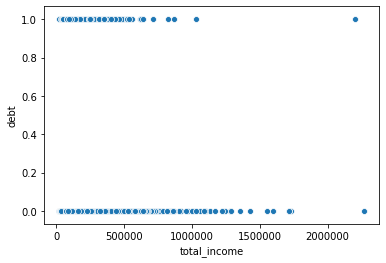

In [64]:
# определим % просрочки в зависимости от количества детей в семье
def category_child(row):
    children=row['children']
    debt=row['debt']
    if children == 0:
        if debt == 0:
            return 'Детей нет, долга нет'
        else:
            return 'Детей нет, просроченыый платеж'
    if children == 1:
        if debt == 0:
            return '1 ребенок, долга нет'
        else:
            return '1 ребенок, просроченыый платеж'
    if children == 2:
        if debt == 0:
            return '2 ребенка, долга нет'
        else:
            return '2 ребенка, просроченыый платеж'
    if children == 3:
        if debt == 0:
            return '3 ребенка, долга нет'
        else:
            return '3 ребенка, просроченыый платеж'
    if children == 4:
        if debt == 0:
            return '4 ребенка, долга нет'
        else:
            return '4 ребенка, просроченыый платеж'
    if children == 5:
        if debt == 0:
            return '5 детей, долга нет'
        else:
            return '5 детей, просроченыый платеж'
    return 'Ошибка в данных'
df['child_group']=df.apply(category_child, axis=1)
print (df['child_group'].value_counts())
print('')


# определим % просрочки в зависимости от семейного статуса
def category_family(row):
    family_status=row['family_status']
    debt=row['debt']
    if family_status == 'женат / замужем':
        if debt == 0:
            return 'В браке, долга нет'
        else:
            return 'В браке, просроченыый платеж'
    if family_status == 'гражданский брак':
        if debt == 0:
            return 'Гражданский брак, долга нет'
        else:
            return 'Гражданский брак, просроченыый платеж'
    if family_status == 'вдовец / вдова':
        if debt == 0:
            return 'Вдовец / вдова, долга нет'
        else:
            return 'Вдовец / вдова, просроченыый платеж'
    if family_status == 'в разводе':
        if debt == 0:
            return 'В разводе, долга нет'
        else:
            return 'В разводе, просроченыый платеж'
    if family_status == 'не женат / не замужем':
        if debt == 0:
            return 'Не женат / не замужем, долга нет'
        else:
            return 'Не женат / не замужем, просроченыый платеж'
    return 'Ошибка в данных'
df['family_group']=df.apply(category_family, axis=1)
print (df['family_group'].value_counts())
print('')

# определим % просрочки в зависимости от ежемесячного дохода
seaborn.scatterplot(x=df['total_income'], y=df['debt']) # строим распределение ежемесяного дохода относительно задолженности
print('Медианный доход ', df['total_income'].median())  # получаем медиану по среднемячному доходу
print('')

# из полученых ранее данных известо, что Максимальный месячный доход 2265604.028722744
# из полученых ранее данных известо, что Минимальный месячный доход 20667.26379327158
# из полученых ранее данных известо, что Медиана 145017
# после анализа граффика делаем выборку по следующим критериям
# <50000, 50000-100000, 100000-150000, 150000-250000, 250000-500000, 500000-1000000, >1000000

def category_money(row):
    total_income=row['total_income']
    debt=row['debt']
    if total_income <= 50000:
        if debt == 0:
            return '<50000, долга нет'
        else:
            return '<50000, просроченыый платеж'
    if total_income >50000 & total_income<=100000:
        if debt == 0:
            return '50-100 тыс.руб, долга нет'
        else:
            return '50-100 тыс.руб, просроченыый платеж'
    if total_income >100000 & total_income<=150000:
        if debt == 0:
            return '100-150 тыс.руб, долга нет'
        else:
            return '100-150 тыс.руб, просроченыый платеж'
    if total_income >150000 & total_income<=250000:
        if debt == 0:
            return '150-250 тыс.руб, долга нет'
        else:
            return '150-250 тыс.руб, просроченыый платеж'
    if total_income >250000 & total_income<=500000:
        if debt == 0:
            return '250-500 тыс.руб, долга нет'
        else:
            return '250-500 тыс.руб, просроченыый платеж'
    if total_income >500000 & total_income<=1000000:
        if debt == 0:
            return '500-1000 тыс.руб, долга нет'
        else:
            return '500-1000 тыс.руб, просроченыый платеж'
    if total_income >1000000:
        if debt == 0:
            return '>1000 тыс.руб, долга нет'
        else:
            return '>1000 тыс.руб, просроченыый платеж'        
    return 'Ошибка в данных'
df['money_group']=df.apply(category_money, axis=1)
print (df['money_group'].value_counts())


- распредилили данный по 3 категориям:
- зависмость наличие детей, семейное положение, ежемесячный доход
- с учетом медийанного дохода и графика распределения задолженности, мы видим что основная масса невозвратов кредитов приходится на диапазон доходов 20000 -600000. 
- с учетом, что 50% респондетов с доходами ниже медианной, деллаем более плотную выборку: <50, 50-100, 100-150 тыс.руб.
- с ростом доходов, выборку уменьшаем 150-250, 250-500, 500-1000, более 1000 тыс.руб.


## Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [65]:
# считаем средний % невозврата кредитов
print("{0:.2f}% просроченных кредитов от общего числа выданных".format(df['debt'].sum()/len(df['debt'])*100))
print('')

print (df['children'].value_counts()) #смотрим вхождения данных в каждую группу
print('')

# создаем сводные таблицы со значериями количество детей и задолженность
# так как семей с детьми>2 относительно мало, объеденим их в общую группу
children_pivot = df.pivot_table(index=['debt'], columns='children', values = 'purpose', aggfunc='count')
child_3_5_1 = children_pivot[3][1] + children_pivot[4][1] + children_pivot[5][1]
child_3_5_0 = children_pivot[3][0] + children_pivot[4][0] + children_pivot[5][0]
child_0 = children_pivot[0][1] / (children_pivot[0][1]+children_pivot[0][0])
child_1 = children_pivot[1][1] / (children_pivot[1][1]+children_pivot[1][0])
child_2 = children_pivot[2][1] / (children_pivot[2][1]+children_pivot[2][0])
child_3_5 = child_3_5_1 / (child_3_5_1+child_3_5_0)

print("{0:.2f}% Нет детей".format(child_0*100))
print("{0:.2f}% 1 Ребенок".format(child_1*100))
print("{0:.2f}% 2 Ребенка".format(child_2*100))
print("{0:.2f}% >2 Детей".format(child_3_5*100))
print('')



8.09% просроченных кредитов от общего числа выданных

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

7.51% Нет детей
9.15% 1 Ребенок
9.48% 2 Ребенка
nan% >2 Детей



**Вывод**

- из полученных данных, мы видим, что наиболее благонадежная ситуация складывается в группе "нет детей"
- с одной стороны возврат кредитов является 100% в группе с 5 детьми, однако % выборки мал по сравнению со всей базой, на основании этого можно сделать вывод, что % возврата кредитов будет приближаться к среднему количеству возвратов
- так как семей с детьми>2 относительно мало, объеденим их в общую группу
- в связи с этим, можно сделать вывод, что наличие детей негативно влияет на возврат кредитов. Невозврат кредитов при наличии детей увеличивается на 1-1,4% от общего количества выданных займов. 
- с учетом того что доля "без детей" приблизительно составляет 65% от общего количества выданных кредитов, при кредетином скорринге это сильно увеличивает долю успешного одобрения кредита

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [66]:
# создаем сводные таблицы со значериями семейное положение и задолженность
# ID = 'женат/замужем'=0, 'гражданский брак'=1, 'вдовец/вдова'=2, 'в разводе'=3, 'не женат/не замужем'=4

family_pivot = df.pivot_table(index=['debt'], columns='family_status_id', values = 'family_status', aggfunc='count')
id_0 = family_pivot[0][1] / (family_pivot[0][1]+family_pivot[0][0])
id_1 = family_pivot[1][1] / (family_pivot[1][1]+family_pivot[1][0])
id_2 = family_pivot[2][1] / (family_pivot[2][1]+family_pivot[2][0])
id_3 = family_pivot[3][1] / (family_pivot[3][1]+family_pivot[4][0])
id_4 = family_pivot[4][1] / (family_pivot[4][1]+family_pivot[4][0])

print("{0:.2f}% женат/замужем".format(id_0*100))
print("{0:.2f}% гражданский брак".format(id_1*100))
print("{0:.2f}% вдовец/вдова".format(id_2*100))
print("{0:.2f}% в разводе".format(id_3*100))
print("{0:.2f}% не женат/не замужем".format(id_4*100))
print('')

print (df['family_status'].value_counts()) #смотрим вхождения данных в каждую группу
print('')



7.52% женат/замужем
9.29% гражданский брак
6.56% вдовец/вдова
3.24% в разводе
9.74% не женат/не замужем

женат / замужем          12380
гражданский брак          4177
не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64



**Вывод**

- все полученные данные важны, даже не смотря на небольшое количество вдовцов, их доля в общей выборке составляет почти 5%
- мы видим что почти 50% заемщиков приходятся на группу женат/замужем, приэтом у них показатели по возврату кредита ниже на 0,5%
- из выборки мы видим, что самые дисциплинорованные заемщики - это люди находящиеся в разводе, либо вдовцы или состоящие в браке
- здесь четко прослеживается зависимость от семейного положения, самые рискованные группы - это не состоящиеся в браке либо находящиеся в гражданском браке (что при указании данных в анкете на получение кредита может означать одно и то же)

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [67]:
# с учетом, что 50% респондетов с доходами ниже медианной, делаем более плотную выборку: <50, 50-100, 100-150 тыс.руб.
# с ростом доходов, выборку уменьшаем 150-250, 250-500, 500-1000, более 1000 тыс.руб.

# делаем категоризацию данных, в зависимости от выборке по доходам
def money_group(row):
    total_income = row['total_income']
    if total_income <= 50000:
        return 'Доход <50'
    if total_income > 50000 and total_income <= 100000:
        return 'Доход 50-100'
    if total_income > 100000 and total_income <= 150000:
        return 'Доход 100-150'    
    if total_income > 150000 and total_income <= 250000:
        return 'Доход 150-250'
    if total_income > 250000 and total_income <= 500000:
        return 'Доход 250-500'
    if total_income > 500000 and total_income <= 1000000:
        return 'Доход 500-1000'
    if total_income > 1000000: 
        return 'Доход >1000'
df['income_group'] = df.apply(money_group, axis=1)

# смотрим распределение по доходам с учетьом возврата кредита
income_pivot = df.pivot_table(index=['debt'], columns='income_group', values = 'purpose', aggfunc='count')
income_50 = income_pivot['Доход <50'][1] / (income_pivot['Доход <50'][1]+income_pivot['Доход <50'][0])
income_100 = income_pivot['Доход 50-100'][1] / (income_pivot['Доход 50-100'][1]+income_pivot['Доход 50-100'][0])
income_150 = income_pivot['Доход 100-150'][1] / (income_pivot['Доход 100-150'][1]+income_pivot['Доход 100-150'][0])
income_250 = income_pivot['Доход 150-250'][1] / (income_pivot['Доход 150-250'][1]+income_pivot['Доход 150-250'][0])
income_500 = income_pivot['Доход 250-500'][1] / (income_pivot['Доход 250-500'][1]+income_pivot['Доход 250-500'][0])
income_1000 = income_pivot['Доход 500-1000'][1] / (income_pivot['Доход 500-1000'][1]+income_pivot['Доход 500-1000'][0])
income_max = income_pivot['Доход >1000'][1] / (income_pivot['Доход >1000'][1]+income_pivot['Доход >1000'][0])

print (df['income_group'].value_counts())  #смотрим вхождения данных в каждую группу
print('')

print("{0:.2f}% Доход <50".format(income_50*100))
print("{0:.2f}% Доход 50-100".format(income_100*100))
print("{0:.2f}% Доход 100-150".format(income_150*100))
print("{0:.2f}% Доход 150-250".format(income_250*100))
print("{0:.2f}% Доход 250-500".format(income_500*100))
print("{0:.2f}% Доход 500-1000".format(income_1000*100))
print("{0:.2f}% Доход >1000".format(income_max*100))

Доход 100-150     7878
Доход 150-250     6372
Доход 50-100      4091
Доход 250-500     2590
Доход <50          372
Доход 500-1000     197
Доход >1000         25
Name: income_group, dtype: int64

6.18% Доход <50
8.09% Доход 50-100
8.39% Доход 100-150
8.35% Доход 150-250
6.95% Доход 250-500
6.09% Доход 500-1000
8.00% Доход >1000


**Вывод**

- несмотря на то, что % возврата кредитов в группах 250-500 и 500-1000 достаточно высокий, их доля в общем объеме выданных кредитов достаточно мала
- аналогично, несмотря на достаточно высокий невозврат кредитов по сравнению со средним значением, из-за малой выборки данных в нашем случае можно принебречь
- доля заемщиков с доходом 250+ составляет 13%, с учетом низкого процента невозврата кредитов, можно рекомендовать данных заемщиков к включению в скорринговую группу с высокой долей одобрения
- доля заемщиков с доходам менее 50 тыс. руб. не превышает 2%, несмотря на низкий % невозвратов кредитов, нельзя рассматривать ее как релевантную группу в предоставленном массиве данных
- таким образом, распределение доходов в соновной своей массе не влияет на выплату кредитов, исключение составляют заемщики с доходами 250+. 
- для более корректного анализа данных необходима более масштабная выборка по заемщикам, а так же выборка по соотношению размера доходов с другими пераметрами (например, такие как размер семьи и цели кредита)

- Как разные цели кредита влияют на его возврат в срок?

In [68]:
# 'стройка' 'недвижимость' 'автомобиль' 'свадьба' 'образование'

purpose_pivot = df.pivot_table(index=['debt'], columns='purpose', values = 'family_status_id', aggfunc='count')
purpose_0 = purpose_pivot['стройка'][1] / (purpose_pivot['стройка'][1]+purpose_pivot['стройка'][0])
purpose_1 = purpose_pivot['недвижимость'][1] / (purpose_pivot['недвижимость'][1]+purpose_pivot['недвижимость'][0])
purpose_2 = purpose_pivot['автомобиль'][1] / (purpose_pivot['автомобиль'][1]+purpose_pivot['автомобиль'][0])
purpose_3 = purpose_pivot['свадьба'][1] / (purpose_pivot['свадьба'][1]+purpose_pivot['свадьба'][0])
purpose_4 = purpose_pivot['образование'][1] / (purpose_pivot['образование'][1]+purpose_pivot['образование'][0])

print (df['purpose'].value_counts())  #смотрим вхождения данных в каждую группу
print('')

print("{0:.2f}% стройка".format(purpose_0*100))
print("{0:.2f}% недвижимость".format(purpose_1*100))
print("{0:.2f}% автомобиль".format(purpose_2*100))
print("{0:.2f}% свадьба".format(purpose_3*100))
print("{0:.2f}% образование".format(purpose_4*100))


недвижимость    8347
автомобиль      4315
образование     4022
стройка         2493
свадьба         2348
Name: purpose, dtype: int64

7.18% стройка
7.22% недвижимость
9.34% автомобиль
7.92% свадьба
9.20% образование


**Вывод**

- самые "невозвратные" кредиты - это займы на "автомобиль" и "образование". Их доля сильно превышает средний долг по выборке. Здесь четко прослеживается группа риска
- самые безопасные 'стройка' и 'недвижимость', их доля составляет практически половину займов и % возврата кредитов выше среднего от общего количества завймов.


## Шаг 4. Общий вывод

- в исходных данных имеются некоректные значения. В большинстве своем они связаны либо с непредоставлением данных заемщиками, либо в ошибках оператора при внесении данных. Ошибки по выгрузке минимальны и по логике имеются только в столбце с данными по стажу.
- исправили некорректные данныйе следующим образом: в стаже в пропущенных данных устанавили среднее значение стажа в 43 года, в ежемесячных доходах заменили на медианное значение в 145000руб.
- доля просроченных кредитов составляет 8,09% по все категориям заемщиков
- наиболее благоприятная ситуация по возврату кредита складывается в группе "нет детей"
- с учетом того что доля "без детей" приблизительно составляет 65% от общего количества выданных кредитов и % невозврата кредитов в этой категории меньше на 1,4% от среднего невозврата, можно сделать вывод, что наличие детей негативно влияет на возврат кредитов. 
- невозврат кредитов при наличии детей увеличивается на 1-1,4% от общего количества выданных займов, в зависимости от количества детей.
- наиболее отвественные плательщики относятся к группе людей, которые на момент получения кредита состоят либо ранее и состояли в официальном браке (вдовцы/вдовы и разведенные граждане).
- доля таких граждан составлет более 65% и % невозвратов составляет 7%, что ниже, 1,1% от общего количкстива невозвратов 
- на долю менбше медианной зарплаты приходится 57% заемщуиков, средний % невозвратов по ним составляет 8,3%, что езначительно выше среднего значения
- самыми дисциплинированными плательщиками являются люди с ежемесячным доходам 250-1000 рублей
- их доля составляет 13% от всех заемщиков и % долгов среди них составляет 6,9%, что ниже среднего значения на 1,2%
- наихудшие показатели по возрату кредитов у заемщиков берущих деньги на покупку автомобиля либо на обучение
- их доля составляет 39%, процент долгов - 9,2%, что превышает среднее значение на 1,1%
- с учетом того что доля таких заемщиков значительно, это является одним из важнейших коссвенных факторов влияющих на возврат денежных средств
- в данной группе надо ужесточить критерии выдачи кредитных средств для снижения доли невозвратов
- таким образом, самыми желанными заемщиками являются кредиторы ранее либо на данный момент состоящие в браке с ежемесячным доходом свыше 250 тыс. руб в месяц берущие займ на покупку либо строительство недвижимости и не имеющие детей.
- однако для получения более релеватных данных, необходимо уменьшить диапазоны выборки по доходам, а так же рассмотреть зависимость указанных выше параметров друг от друга.